<a href="https://colab.research.google.com/github/bonsnv/Machine-Learning/blob/main/Tugas_Building_Tuning_dan_Deploying_Model_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : David Stefanus Bona Sihite

NIM : 4112322020

## Data loading

Memuat set data “loan_approval_dataset.csv” ke dalam DataFrame pandas dan menampilkan beberapa informasi dasar untuk diverifikasi.


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/bonsnv/Machine-Learning/refs/heads/main/loan_approval_dataset.csv')
print(df.head())
print(df.shape)
print(df.dtypes)

   Age  Income Education_Level  Credit_Score  Loan_Amount Loan_Purpose  \
0   56   24000             PhD           333        26892     Personal   
1   46   90588          Master           316        26619         Home   
2   32  113610             PhD           452         1281     Personal   
3   60  117856     High School           677        28420     Personal   
4   25   58304             PhD           641        16360          Car   

   Loan_Approval  
0              0  
1              1  
2              1  
3              0  
4              0  
(500, 7)
Age                 int64
Income              int64
Education_Level    object
Credit_Score        int64
Loan_Amount         int64
Loan_Purpose       object
Loan_Approval       int64
dtype: object


## Data exploration

Mengidentifikasi nilai yang hilang, menghasilkan statistik deskriptif, dan memvisualisasikan distribusi data untuk fitur numerik dan kategorikal. Juga, menghitung dan memvisualisasikan matriks korelasi untuk fitur numerik.


### Identifikasi Mising Value

In [11]:
# Mengecek missing values pada dataset
missing_values = df.isnull().sum()
missing_values

,0
Age,0
Income,0
Education_Level,0
Credit_Score,0
Loan_Amount,0
Loan_Purpose,0
Loan_Approval,0


In [12]:
df.describe()

,Age,Income,Credit_Score,Loan_Amount,Loan_Approval
count,500.000000,500.00000,500.00000,500.000000,500.000000
mean,41.278000,67210.16800,572.37800,26526.744000,0.596000
std,13.389072,28908.77426,159.71466,13931.322188,0.491189
min,18.000000,20055.00000,301.00000,1125.000000,0.000000
25%,30.000000,42534.25000,432.00000,13327.500000,0.000000
50%,42.000000,64906.50000,584.00000,27985.500000,1.000000
75%,52.000000,93071.25000,698.50000,38381.000000,1.000000
max,64.000000,119835.00000,848.00000,49938.000000,1.000000


Karena menunjukkan tidak ada nilai yang hilang, maka tidak perlu dilakukan cleaning data

### Visualisasi Data

#### Distibusi Data

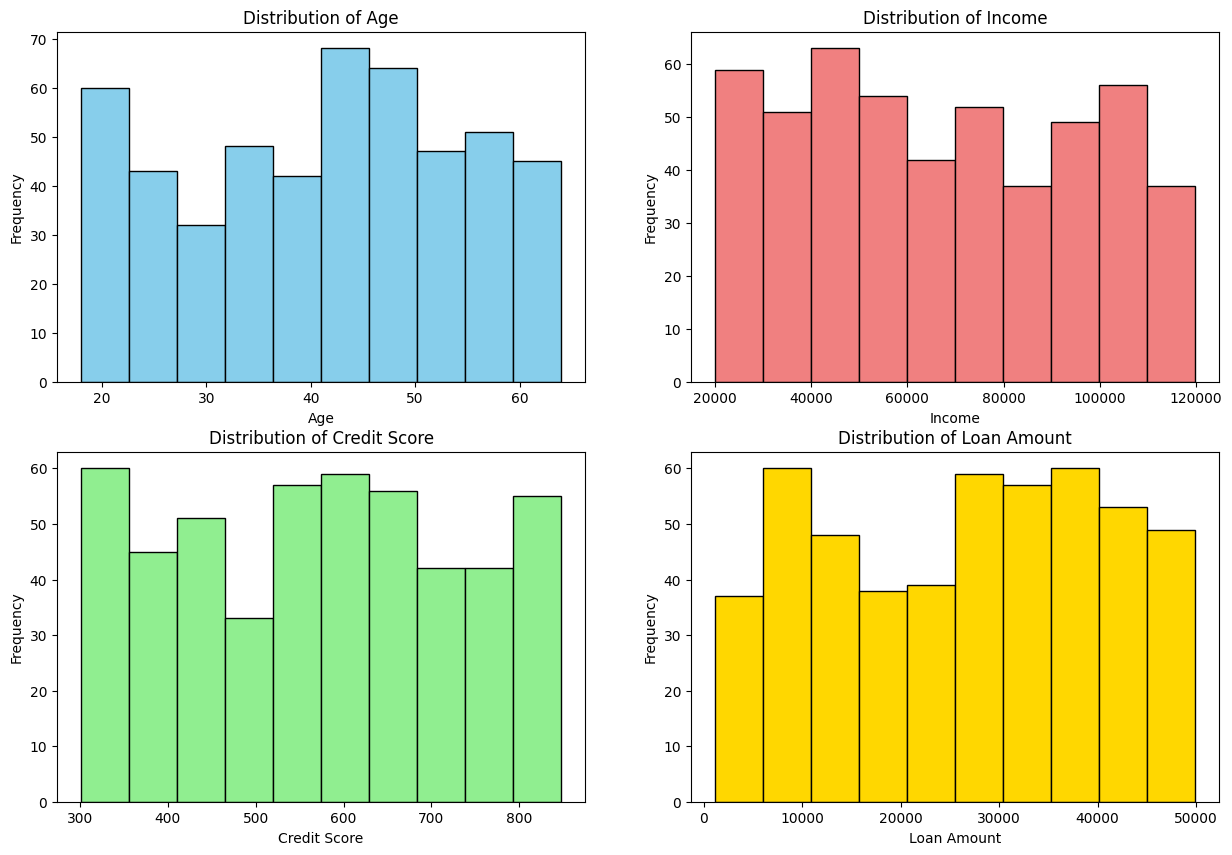

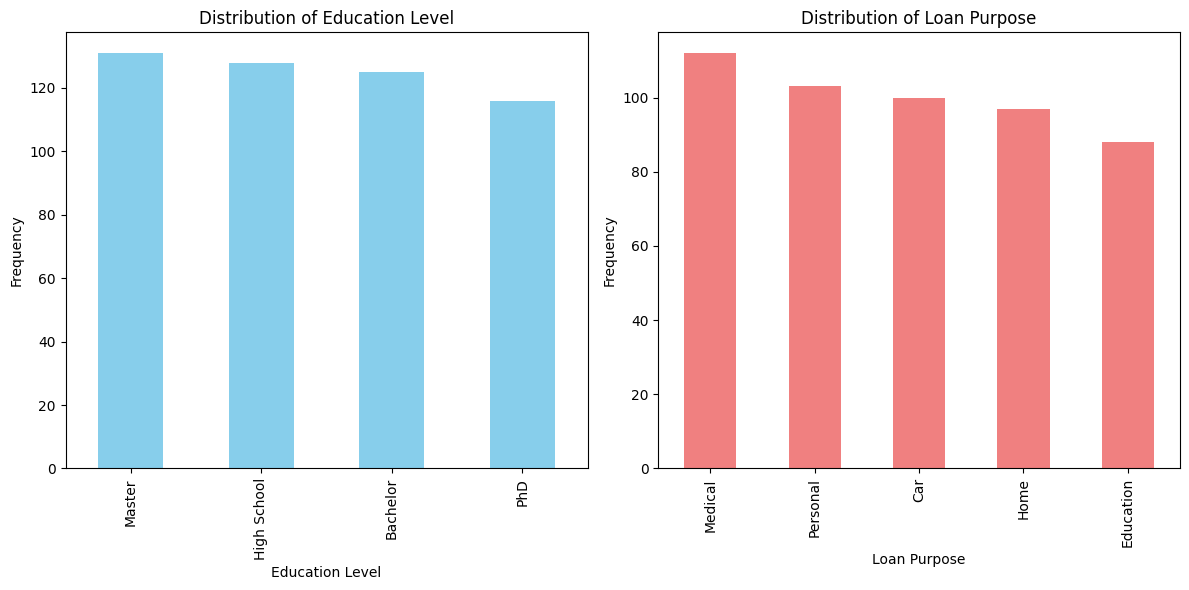

In [14]:
# Data Distribution Visualization
plt.figure(figsize=(15, 10))

# Numerical Features
plt.subplot(2, 2, 1)
plt.hist(df['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(df['Income'], bins=10, color='lightcoral', edgecolor='black')
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(df['Credit_Score'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Distribution of Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(df['Loan_Amount'], bins=10, color='gold', edgecolor='black')
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')

# Categorical Features
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df['Education_Level'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Education Level')
plt.xlabel('Education Level')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
df['Loan_Purpose'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Distribution of Loan Purpose')
plt.xlabel('Loan Purpose')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#### Korelasi Data

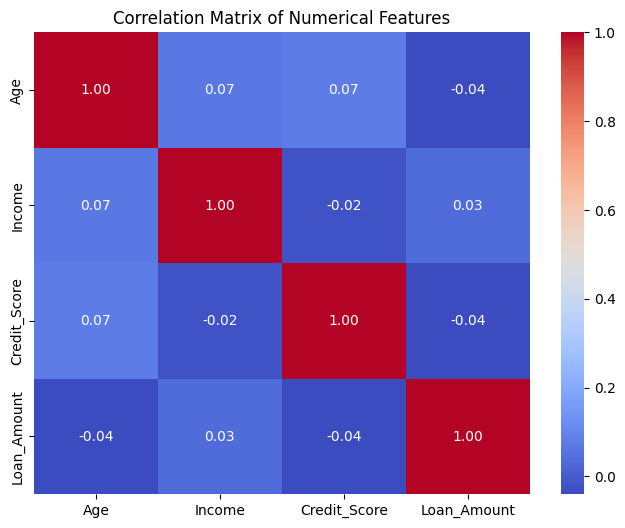

In [16]:
# Analisis Korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Age', 'Income', 'Credit_Score', 'Loan_Amount']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Data wrangling

Siapkan data untuk pemodelan dengan melakukan one-hot encoding pada fitur kategorikal dan penskalaan fitur numerik.


In [18]:
# Identify categorical and numerical features
categorical_features = ['Education_Level', 'Loan_Purpose', 'Loan_Approval']
numerical_features = ['Age', 'Income', 'Credit_Score', 'Loan_Amount']

# One-hot encode categorical features
encoded_features = pd.get_dummies(df[categorical_features], drop_first=True)
df = df.drop(categorical_features, axis=1)
df = pd.concat([df, encoded_features], axis=1)

# Scale numerical features
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

display(df.head())

,Age,Income,Credit_Score,Loan_Amount,Loan_Approval,Education_Level_High School,Education_Level_Master,Education_Level_PhD,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Medical,Loan_Purpose_Personal
0,1.100655,-1.496205,-1.500286,0.026245,0,False,False,True,False,False,False,True
1,0.353029,0.809486,-1.606833,0.006629,1,False,True,False,False,True,False,False
2,-0.693647,1.606651,-0.754461,-1.813972,1,False,False,True,False,False,False,True
3,1.399705,1.753674,0.655712,0.136035,0,True,False,False,False,False,False,True
4,-1.216985,-0.308387,0.430084,-0.730507,0,False,False,True,False,False,False,False


## Data splitting

Membagi data yang telah diproses sebelumnya ke dalam set pelatihan dan pengujian menggunakan train_test_split.

In [21]:
# Define features (X) and target variable (y)
X = df.drop('Loan_Approval', axis=1)
y = df['Loan_Approval']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (400, 11)
X_test shape: (100, 11)
y_train shape: (400,)
y_test shape: (100,)


## Model training

Model yang digunakan adalah Regresi Logistik dan Random Forest Classifier. Regresi Logistik adalah algoritma yang dirancang khusus untuk masalah klasifikasi biner, di mana target variabelnya hanya memiliki dua kemungkinan hasil (dalam kasus ini, disetujui atau ditolak). Karena tujuan kita adalah memprediksi apakah pinjaman akan disetujui atau tidak, Regresi Logistik menjadi pilihan yang alami. Random Forest dapat menangani hubungan non-linear antara fitur dan target variabel, yang mungkin penting dalam kasus prediksi persetujuan pinjaman di mana faktor-faktor yang kompleks dapat berperan.

Latih Regresi Logistik dan Random Forest Classifier pada data latih yang telah disiapkan.

In [23]:
# Initialize the models
logreg_model = LogisticRegression()
rf_model = RandomForestClassifier()

# Train the models
logreg_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestClassifier()

## Model evaluation

Mengevaluasi kinerja model Regresi Logistik dan Random Forest Classifier yang telah dilatih dengan menggunakan metrik yang sesuai.


In [25]:
# Predict on the test set
y_pred_logreg = logreg_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Evaluate the models
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    print(f"{model_name} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"AUC-ROC: {roc_auc:.4f}")
    print("-" * 20)

evaluate_model(y_test, y_pred_logreg, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")

Logistic Regression Metrics:
Accuracy: 0.6200
Precision: 0.6344
Recall: 0.9365
F1-score: 0.7564
AUC-ROC: 0.5088
--------------------
Random Forest Metrics:
Accuracy: 0.4800
Precision: 0.5821
Recall: 0.6190
F1-score: 0.6000
AUC-ROC: 0.4311
--------------------


## Model optimization

Mengoptimalkan hiperparameter model Regresi Logistik karena memiliki metrik evaluasi lebih baik dibanding Random Forest menggunakan GridSearchCV.


In [27]:
# Define the parameter grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'saga']}

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=logreg_model, param_grid=param_grid, scoring='roc_auc', cv=5)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and best score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Hyperparameters: {'C': 0.001, 'solver': 'liblinear'}
Best Score: 0.48149580915538365


## Model evaluation

Mengevaluasi kinerja model Regresi Logistik yang telah dituning dan membandingkan kinerjanya dengan model sebelum dituning.


In [28]:
# Use the best estimator from GridSearchCV to predict on the test set
best_logreg_model = grid_search.best_estimator_
y_pred_tuned = best_logreg_model.predict(X_test)

# Evaluate the tuned model
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    return {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1-score": f1, "AUC-ROC": roc_auc}


tuned_metrics = evaluate_model(y_test, y_pred_tuned, "Tuned Logistic Regression")
initial_metrics = evaluate_model(y_test, y_pred_logreg, "Initial Logistic Regression")

# Create a DataFrame to compare the metrics
comparison_df = pd.DataFrame([initial_metrics, tuned_metrics], index=["Initial Model", "Tuned Model"])
display(comparison_df)

,Accuracy,Precision,Recall,F1-score,AUC-ROC
Initial Model,0.62,0.634409,0.936508,0.756410,0.508795
Tuned Model,0.63,0.630000,1.000000,0.773006,0.500000


## Kesimpulan:

Model Regresi Logistik, setelah dilakukan tuning hyperparameter menggunakan GridSearchCV, menunjukkan performa yang sedikit lebih baik dibandingkan dengan model Regresi Logistik awal dan Random Forest Classifier.  Meskipun model yang disetel mencapai recall yang sempurna, model awal memiliki skor AUC-ROC yang lebih tinggi. Pilihan model “terbaik” tergantung pada kebutuhan bisnis spesifik dan kepentingan relatif dari metrik evaluasi yang berbeda (recall, AUC-ROC, akurasi, dll.).